In [18]:
%matplotlib widget
import numpy as np
from pathlib import Path
from glob import glob
import matplotlib.pyplot as plt
import ccdproc as ccdp
from astropy.utils.data import get_pkg_data_filename
import astropy
from astropy.stats import mad_std
import pandas as pd
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
import scipy
from scipy import ndimage
from scipy import misc

In [2]:
bias1= astropy.io.fits.open('BIAS_B11-001.fit')
bias2= astropy.io.fits.open('BIAS_B11-002.fit')
bias3= astropy.io.fits.open('BIAS_B11-003.fit')
bias4= astropy.io.fits.open('BIAS_B11-004.fit')
bias5= astropy.io.fits.open('BIAS_B11-005.fit')
bias6= astropy.io.fits.open('BIAS_B11-006.fit')
bias7= astropy.io.fits.open('BIAS_B11-007.fit')
bias8= astropy.io.fits.open('BIAS_B11-008.fit')
bias9= astropy.io.fits.open('BIAS_B11-009.fit')

dark1= astropy.io.fits.open('DARK_60sec_B11-001.fit')
dark2= astropy.io.fits.open('DARK_60sec_B11-002.fit')
dark3= astropy.io.fits.open('DARK_60sec_B11-003.fit')
dark4= astropy.io.fits.open('DARK_60sec_B11-004.fit')
dark5= astropy.io.fits.open('DARK_60sec_B11-005.fit')
dark6= astropy.io.fits.open('DARK_60sec_B11-006.fit')
dark7= astropy.io.fits.open('DARK_60sec_B11-007.fit')
dark8= astropy.io.fits.open('DARK_60sec_B11-008.fit')
dark9= astropy.io.fits.open('DARK_60sec_B11-009.fit')

flatB1= astropy.io.fits.open('FLAT_B_B11-001.fit')
flatB2= astropy.io.fits.open('FLAT_B_B11-002.fit')
flatB3= astropy.io.fits.open('FLAT_B_B11-003.fit')
flatB4= astropy.io.fits.open('FLAT_B_B11-004.fit')
flatB5= astropy.io.fits.open('FLAT_B_B11-005.fit')
flatB6= astropy.io.fits.open('FLAT_B_B11-006.fit')
flatB7= astropy.io.fits.open('FLAT_B_B11-007.fit')
flatB8= astropy.io.fits.open('FLAT_B_B11-008.fit')
flatB9= astropy.io.fits.open('FLAT_B_B11-009.fit')
flatB10= astropy.io.fits.open('FLAT_B_B11-010.fit')

flat_sloani1 =astropy.io.fits.open('FLAT_sloan_i_B11-001.fit')
flat_sloani2 =astropy.io.fits.open('FLAT_sloan_i_B11-002.fit')
flat_sloani3 =astropy.io.fits.open('FLAT_sloan_i_B11-003.fit')
flat_sloani4 =astropy.io.fits.open('FLAT_sloan_i_B11-004.fit')
flat_sloani5 =astropy.io.fits.open('FLAT_sloan_i_B11-005.fit')
flat_sloani6 =astropy.io.fits.open('FLAT_sloan_i_B11-006.fit')
flat_sloani7 =astropy.io.fits.open('FLAT_sloan_i_B11-007.fit')

flat_sloanr1 = astropy.io.fits.open('FLAT_sloan_r_B11-001.fit')
flat_sloanr2 = astropy.io.fits.open('FLAT_sloan_r_B11-002.fit')
flat_sloanr3 = astropy.io.fits.open('FLAT_sloan_r_B11-003.fit')
flat_sloanr4 = astropy.io.fits.open('FLAT_sloan_r_B11-004.fit')
flat_sloanr5 = astropy.io.fits.open('FLAT_sloan_r_B11-005.fit')
flat_sloanr6 = astropy.io.fits.open('FLAT_sloan_r_B11-006.fit')
flat_sloanr7 = astropy.io.fits.open('FLAT_sloan_r_B11-007.fit')

In [3]:
master_bias= np.mean(np.array([bias1[0].data,bias2[0].data,bias3[0].data,\
bias4[0].data,bias5[0].data,bias6[0].data,bias7[0].data,bias8[0].data,bias9[0].data]), axis=0)

darklist= np.array([dark1[0].data, dark2[0].data, dark3[0].data, dark4[0].data,\
dark5[0].data, dark6[0].data, dark7[0].data, dark8[0].data, dark9[0].data]) - master_bias

master_dark = np.median(darklist, axis = 0)

darkybias= master_dark + master_bias

flatBlist= np.mean(np.array([flatB1[0].data, flatB2[0].data, flatB3[0].data, flatB4[0].data, flatB5[0].data,
                             flatB6[0].data, flatB7[0].data, flatB8[0].data, flatB9[0].data, flatB10[0].data]), axis=0)

flat_sloanilist= np.mean(np.array([flat_sloani1[0].data, flat_sloani2[0].data, flat_sloani3[0].data, flat_sloani4[0].data, flat_sloani5[0].data, 
                             flat_sloani6[0].data, flat_sloani7[0].data]), axis=0)

flat_sloanrlist = np.mean(np.array([flat_sloanr1[0].data, flat_sloanr2[0].data, flat_sloanr3[0].data, flat_sloanr4[0].data, flat_sloanr5[0].data, 
                             flat_sloanr6[0].data, flat_sloanr7[0].data]), axis = 0)

master_flat_sloani = (flat_sloanilist - darkybias)/(np.median(flat_sloanilist - darkybias))

master_flat_B = (flatBlist - darkybias)/(np.median(flatBlist - darkybias))

master_flat_sloanr = (flat_sloanrlist -darkybias)/(np.median(flat_sloanrlist - darkybias))

In [4]:
flat_sloani1, flat_sloani2, flat_sloani3, flat_sloani4, flat_sloani5, flat_sloani6, flat_sloani7 = (None,)*7 

dark1, dark2, dark3, dark4, dark5, dark6, dark7, dark8, dark9 = (None,)*9

flatB1, flatB2, flatB3, flatB4, flatB5, flatB6, flatB7, flatB8, flatB9, flatB10 = (None,)*10

flat_sloanr1, flat_sloanr2, flat_sloanr3, flat_sloanr4, flat_sloanr5, flat_sloanr6, flat_sloanr7 = (None,)*7

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
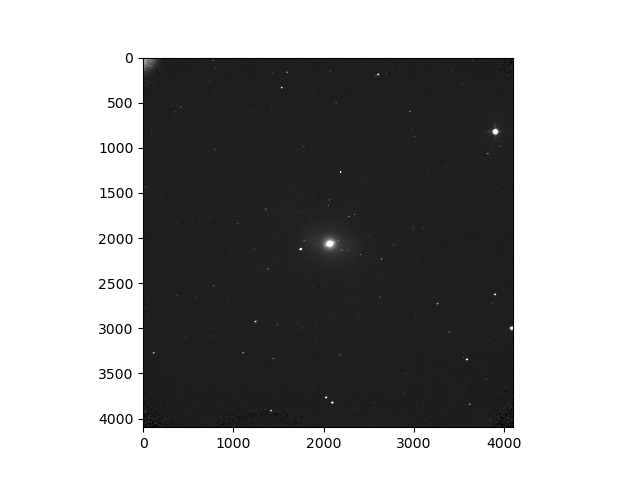

In [5]:
B1= astropy.io.fits.open('Light00000013.fit')
B1redux= (B1[0].data - darkybias)/ master_flat_sloani
plt.imshow(B1redux, cmap='gray', vmin=0, vmax=np.mean(B1redux)+np.std(B1redux))
plt.show()
plt.close()

In [5]:
np.random.seed(1)
px = np.random.randint(0,4096,size=100)
py=np.random.randint(0,4096,size=100)
rayos=np.vstack([px,py]).T
B1= astropy.io.fits.open('Light00000006.fit')
B1d= B1[0].data
for i in range(100):
    B1d[rayos[i,0],rayos[i,1]]=60000 
    B1d[rayos[i,0],rayos[i,1]+1]=60000
    B1d[rayos[i,0],rayos[i,1]+2]=60000
    B1d[rayos[i,0],rayos[i,1]+3]=60000
    B1d[rayos[i,0],rayos[i,1]-1]=60000
    B1d[rayos[i,0],rayos[i,1]-2]=60000
    B1d[rayos[i,0],rayos[i,1]-3]=60000
    
np.random.seed(2)
px2=np.random.randint(0,4096,size=100)
py2=np.random.randint(0,4096,size=100)
rayos2=np.vstack([px2,py2]).T
B2= astropy.io.fits.open('Light00000007.fit')
B2d= B2[0].data
for i in range(100):
    B2d[rayos2[i,0],rayos2[i,1]]=60000 
    B2d[rayos2[i,0],rayos2[i,1]+1]=60000
    B2d[rayos2[i,0],rayos2[i,1]+2]=60000
    B2d[rayos2[i,0],rayos2[i,1]+3]=60000
    B2d[rayos2[i,0],rayos2[i,1]-1]=60000
    B2d[rayos2[i,0],rayos2[i,1]-2]=60000
    B2d[rayos2[i,0],rayos2[i,1]-3]=60000

np.random.seed(3)
px3=np.random.randint(0,4096,size=100)
py3=np.random.randint(0,4096,size=100)
rayos3=np.vstack([px3,py3]).T
B3= astropy.io.fits.open('Light00000008.fit')
B3d= B3[0].data
for i in range(100):
    B3d[rayos3[i,0],rayos3[i,1]]=60000 
    B3d[rayos3[i,0],rayos3[i,1]+1]=60000
    B3d[rayos3[i,0],rayos3[i,1]+2]=60000
    B3d[rayos3[i,0],rayos3[i,1]+3]=60000
    B3d[rayos3[i,0],rayos3[i,1]-1]=60000
    B3d[rayos3[i,0],rayos3[i,1]-2]=60000
    B3d[rayos3[i,0],rayos3[i,1]-3]=60000

np.random.seed(4)
px4=np.random.randint(0,4096,size=100)
py4=np.random.randint(0,4096,size=100)
rayos4=np.vstack([px4,py4]).T
Si1= astropy.io.fits.open('Light00000013.fit')
Si1d= Si1[0].data
for i in range(100):
    Si1d[rayos4[i,0],rayos4[i,1]]=60000 
    Si1d[rayos4[i,0],rayos4[i,1]+1]=60000
    Si1d[rayos4[i,0],rayos4[i,1]+2]=60000
    Si1d[rayos4[i,0],rayos4[i,1]+3]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-1]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-2]=60000
    Si1d[rayos4[i,0],rayos4[i,1]-3]=60000
    
np.random.seed(5)
px5=np.random.randint(0,4096,size=100)
py5=np.random.randint(0,4096,size=100)
rayos5=np.vstack([px5,py5]).T
Si2= astropy.io.fits.open('Light00000014.fit')
Si2d= Si2[0].data
for i in range(100):
    Si2d[rayos5[i,0],rayos5[i,1]]=60000 
    Si2d[rayos5[i,0],rayos5[i,1]+1]=60000
    Si2d[rayos5[i,0],rayos5[i,1]+2]=60000
    Si2d[rayos5[i,0],rayos5[i,1]+3]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-1]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-2]=60000
    Si2d[rayos5[i,0],rayos5[i,1]-3]=60000
    
np.random.seed(6)
px6=np.random.randint(0,4096,size=100)
py6=np.random.randint(0,4096,size=100)
rayos6=np.vstack([px6,py6]).T
Si3= astropy.io.fits.open('Light00000015.fit')
Si3d= Si3[0].data
for i in range(100):
    Si3d[rayos6[i,0],rayos6[i,1]]=60000 
    Si3d[rayos6[i,0],rayos6[i,1]+1]=60000
    Si3d[rayos6[i,0],rayos6[i,1]+2]=60000
    Si3d[rayos6[i,0],rayos6[i,1]+3]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-1]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-2]=60000
    Si3d[rayos6[i,0],rayos6[i,1]-3]=60000
    
np.random.seed(7)
px7=np.random.randint(0,4096,size=100)
py7=np.random.randint(0,4096,size=100)
rayos7=np.vstack([px7,py7]).T
Sr1= astropy.io.fits.open('Light00000009.fit')
Sr1d= Sr1[0].data
for i in range(100):
    Sr1d[rayos7[i,0],rayos7[i,1]]=60000 
    Sr1d[rayos7[i,0],rayos7[i,1]+1]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]+2]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]+3]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-1]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-2]=60000
    Sr1d[rayos7[i,0],rayos7[i,1]-3]=60000
    

np.random.seed(8)
px8=np.random.randint(0,4096,size=100)
py8=np.random.randint(0,4096,size=100)
rayos8=np.vstack([px8,py8]).T
Sr2= astropy.io.fits.open('Light00000010.fit')
Sr2d= Sr2[0].data
for i in range(100):
    Sr2d[rayos8[i,0],rayos8[i,1]]=60000 
    Sr2d[rayos8[i,0],rayos8[i,1]+1]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]+2]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]+3]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-1]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-2]=60000
    Sr2d[rayos8[i,0],rayos8[i,1]-3]=60000

np.random.seed(9)
px9=np.random.randint(0,4096,size=100)
py9=np.random.randint(0,4096,size=100)
rayos9=np.vstack([px9,py9]).T
Sr3= astropy.io.fits.open('Light00000012.fit')
Sr3d= Sr3[0].data
for i in range(100):
    Sr3d[rayos9[i,0],rayos9[i,1]]=60000 
    Sr3d[rayos9[i,0],rayos9[i,1]+1]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]+2]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]+3]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-1]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-2]=60000
    Sr3d[rayos9[i,0],rayos9[i,1]-3]=60000 

In [6]:
BR1=(B1d-darkybias)/(master_flat_B)
BR2=(B2d-darkybias)/(master_flat_B)
BR3=(B3d-darkybias)/(master_flat_B)
SiR1=(Si1d-darkybias)/(master_flat_sloani)
SiR2=(Si2d-darkybias)/(master_flat_sloani)
SiR3=(Si3d-darkybias)/(master_flat_sloani)
SrR1=(Sr1d-darkybias)/(master_flat_sloanr)
SrR2=(Sr2d-darkybias)/(master_flat_sloanr)
SrR3=(Sr3d - darkybias)/(master_flat_sloanr)

In [7]:
B=np.median(np.array([BR1,BR2,BR3]),axis=0)
Si=np.median(np.array([SiR1,SiR2,SiR3]),axis=0)
Sr=np.median(np.array([SrR1,SrR2,SrR3]),axis=0)
B[B <0] = 0
Sr[Sr < 0] = 0
Si[Si < 0] = 0

Si_raw=np.median(np.array([Si1[0].data, Si2[0].data, Si3[0].data]), axis=0)
B_raw = np.median(np.array([B1[0].data, B2[0].data, B3[0].data]), axis=0)
Sr_raw = np.median(np.array([Sr1[0].data, Sr2[0].data, Sr3[0].data]), axis=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
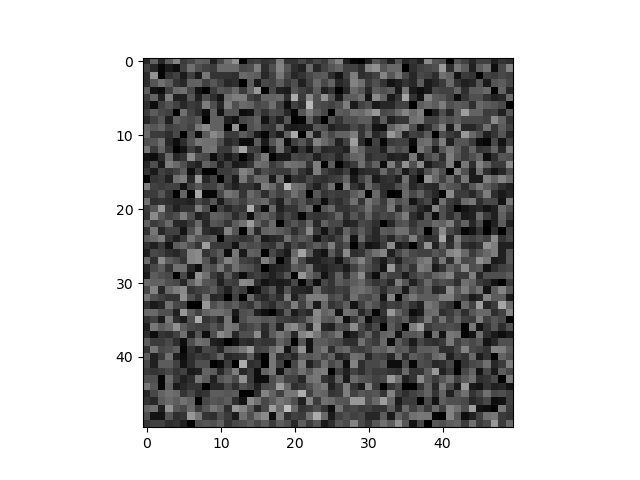

In [20]:
Pixeles1 = B[B < np.mean(B[2800:2850, 2800:2850])]
plt.imshow(B[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(B)+np.std(B))
plt.show()
plt.savefig('Pixel 2800 a 2850 en eje xy')

In [17]:
B[0].data

In [9]:
BgB = np.mean(Pixeles1)
print('Nivel de background para el filtro B', BgB)

Nivel de background para el filtro B 5.739840311588215


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
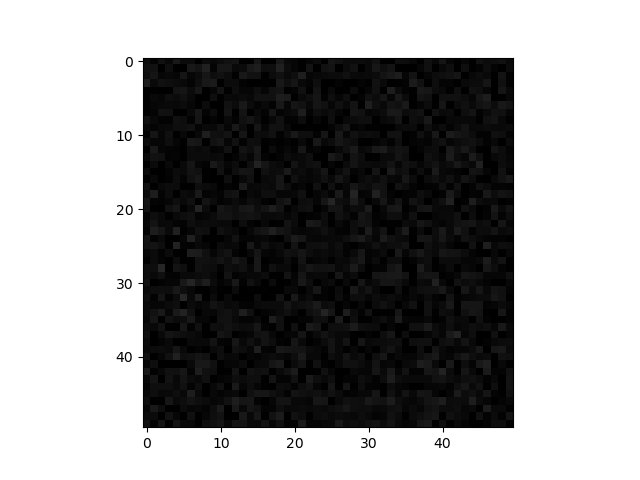

In [21]:
Pixeles2 = Sr[Sr < np.mean(Sr[2800:2850, 2800:2850])]
plt.imshow(Sr[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(Sr)+np.std(Sr))
plt.show()

In [22]:
BgSr =np.mean(Pixeles2)
print('Nivel de background para el filtro Sloan r', BgSr)

Nivel de background para el filtro Sloan r 2.4953214217883635


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
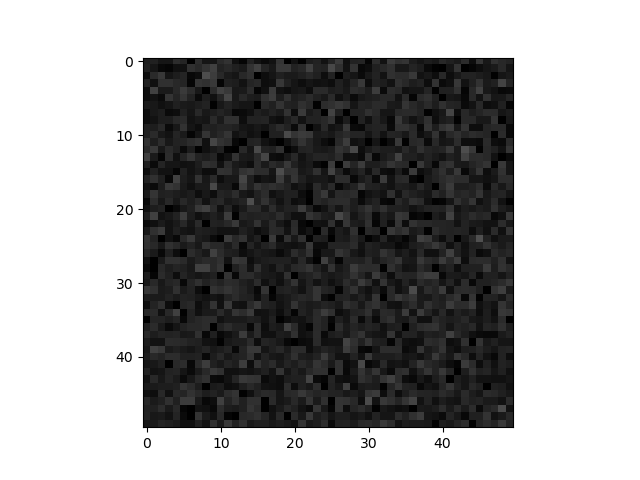

In [23]:
Pixeles3 = Si[Si < np.mean(Si[2800:2850, 2800:2850])]
plt.imshow(Si[2800:2850, 2800:2850], cmap='gray', vmin=0, vmax=np.mean(Si)+np.std(Si))
plt.show()

In [24]:
BgSi = np.mean(Pixeles3)
print('Nivel de background para el filtro Sloan i:', BgSi)

Nivel de background para el filtro Sloan i: 6.361341865117099


In [25]:
Si[2800:2850, 2800:2850].shape

(50, 50)

In [11]:
Bsinestrellas = B00[B00 <50]
Bsinestrellas
Bsinestrellas_prom = np.mean(Bsinestrellas)
print(Bsinestrellas_prom)
Bprom = np.mean(B)
print(Bprom)
Bstd = np.std(B)
print(Bstd)
Bsinestrellas_std = np.std(Bsinestrellas)
print(Bsinestrellas_std)

10.862993923411913
10.28776792355895
26.708880899109904
5.4672855782220955


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
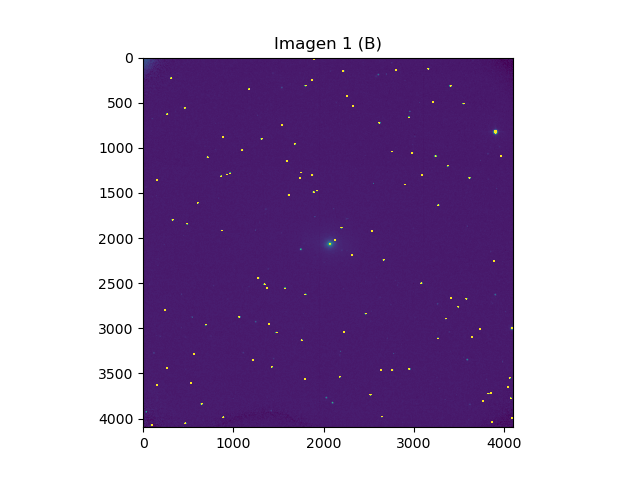

In [8]:
plt.imshow(BR1,cmap='viridis',vmin=0,vmax=140)
plt.title('Imagen 1 (B)') #con rayos cosmicos
plt.show()
plt.savefig('BR1')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
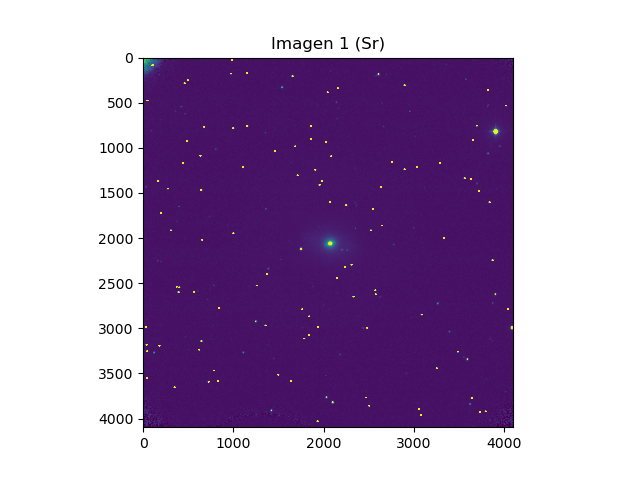

In [15]:
plt.imshow(SrR1,cmap='viridis',vmin=0,vmax=140)
plt.title('Imagen 1 (Sr)') #con rayos cosmicos
plt.show()
plt.savefig('SrR1')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
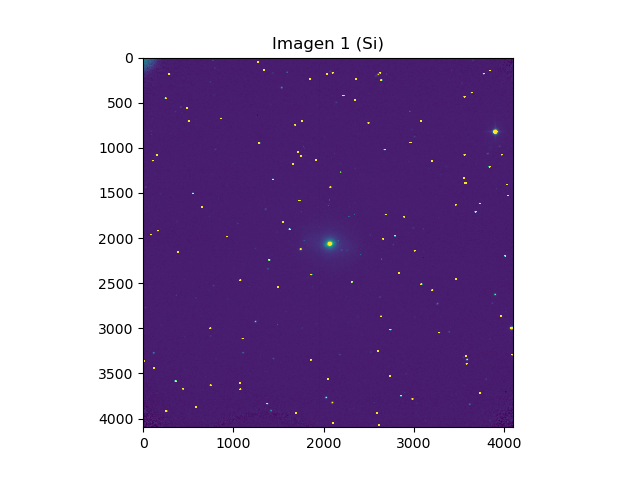

In [14]:
plt.imshow(SiR1,cmap='viridis',vmin=0,vmax=140)
plt.title('Imagen 1 (Si)') #con rayos cosmicos
plt.show()
plt.savefig('SiR1')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
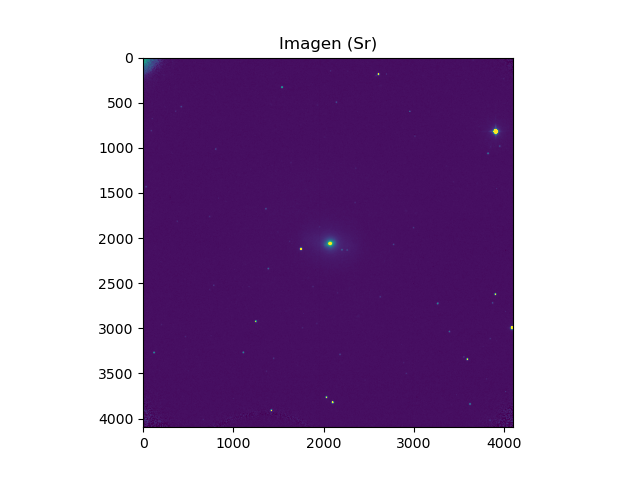

In [17]:
plt.imshow(Sr,cmap='viridis',vmin=0,vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen (Sr)')
plt.show()
plt.savefig('Imagen Sr')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
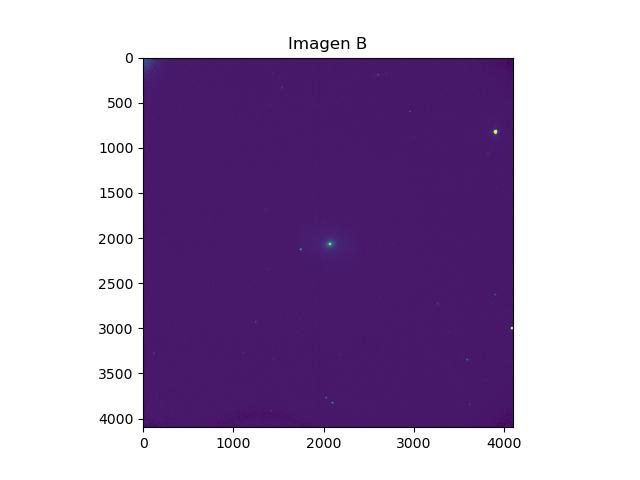

In [18]:
plt.imshow(B,cmap='viridis',vmin=0,vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen B')
plt.show()
plt.savefig('Imagen B')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
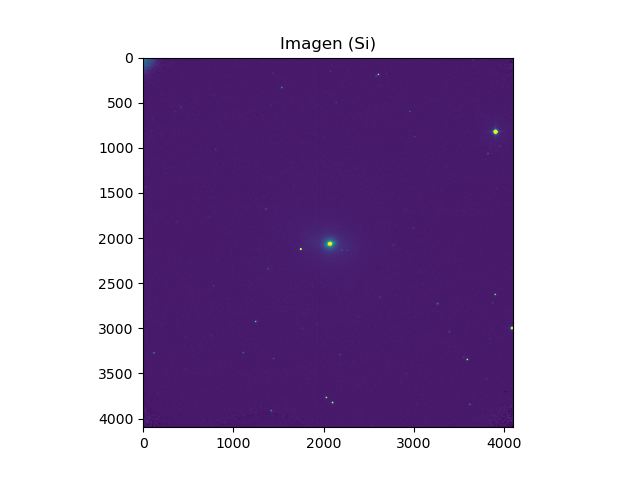

In [19]:
plt.imshow(Si,cmap='viridis',vmin=0,vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen (Si)')
plt.show()
plt.savefig('Imagen Si')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
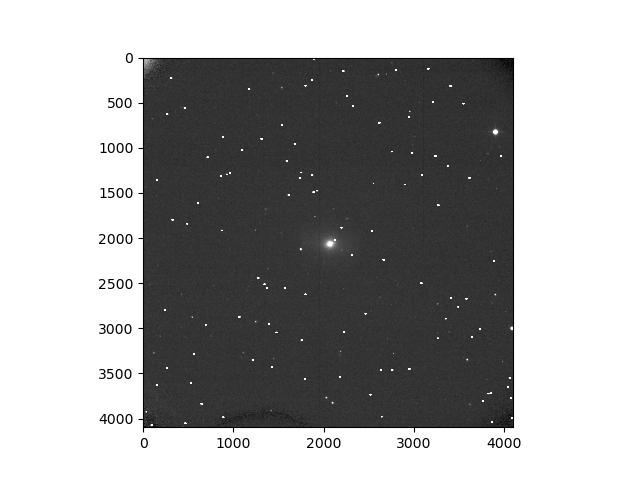

In [26]:
B1dredux = (B1d - darkybias)/master_flat_B #plot de unas imagenes con filtro B y agregandole rayos cosmicos
plt.imshow(B1dredux, cmap='gray', vmin=0, vmax=50)
plt.show()

In [22]:
rgb = make_lupton_rgb(Si, Sr, B, Q=10, stretch=0.5, filename='ngc1269.png')
plt.imshow(rgb, origin='lower')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
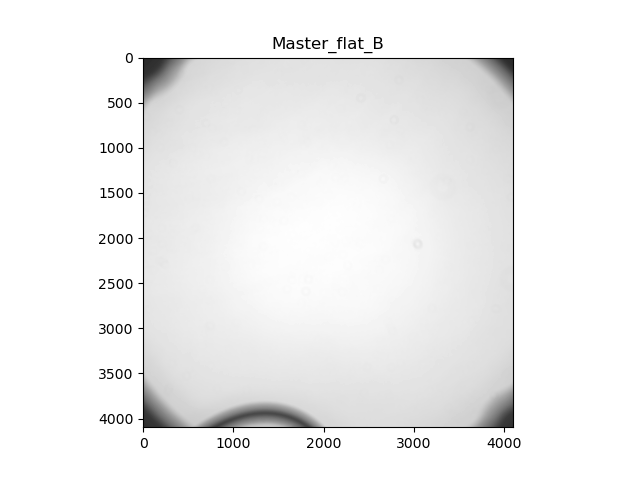

In [8]:
#B1= astropy.io.fits.open('Light00000013.fit')
plt.imshow(master_flat_B, cmap='gray', vmin=0, vmax=np.mean(master_flat_B)+np.std(master_flat_B))
plt.title('Master_flat_B')
plt.show()
plt.colorbar()
plt.savefig('Master_flat_B normalizado')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
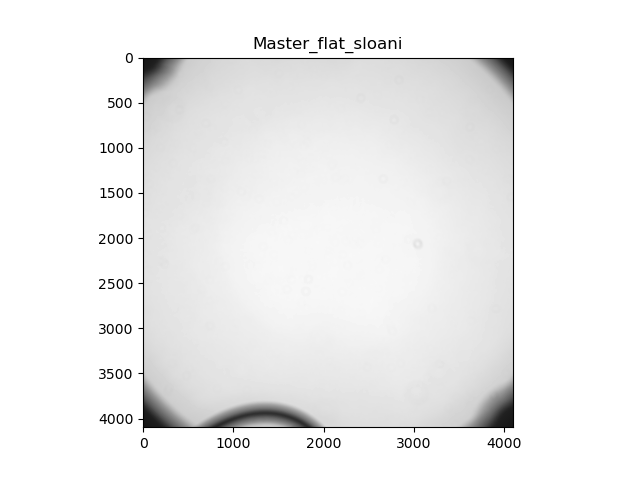

In [8]:
plt.imshow(master_flat_sloani, cmap='gray', vmin=0, vmax=np.mean(master_flat_sloani)+np.std(master_flat_sloani))
plt.title('Master_flat_sloani')
plt.show()
plt.colorbar()
plt.savefig('Master_flat_sloani normalizado')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
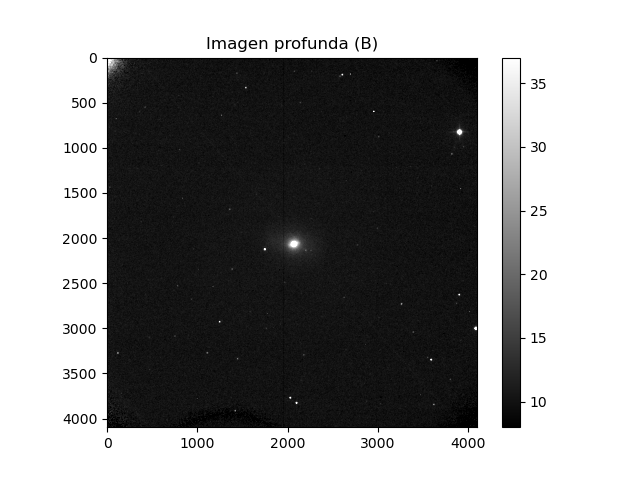

In [8]:
plt.imshow(B, cmap='gray', vmin=8, vmax=np.mean(B)+np.std(B))
plt.title('Imagen profunda (B)')
plt.colorbar()
plt.savefig('Imagen profunda B3')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
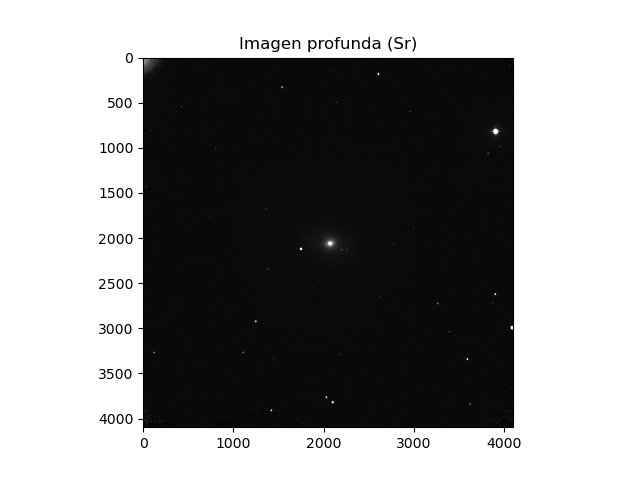

In [8]:
plt.imshow(Sr, cmap='gray', vmin=0, vmax=np.mean(Sr)+np.std(Sr))
plt.title('Imagen profunda (Sr)')
plt.show()
plt.colorbar()
plt.savefig('Imagen profunda Sr')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
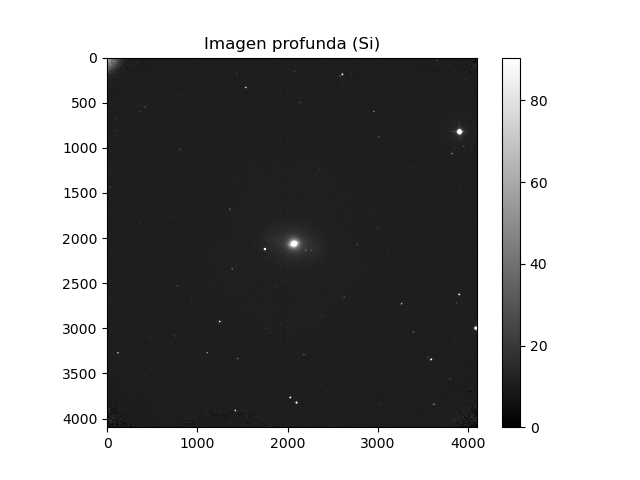

In [8]:
plt.imshow(Si, cmap='gray', vmin=0, vmax=np.mean(Si)+np.std(Si))
plt.title('Imagen profunda (Si)')
plt.colorbar()
plt.savefig('Imagen profunda Si')
plt.show()

In [8]:
B3= astropy.io.fits.open('Light00000008.fit')
B3

In [8]:
sqrtB=np.sqrt(B)
quadB=np.square(B)
cosB=np.cos(B)
doubleB=B*2
logB=np.log1p(B)

sqrtSi=np.sqrt(Si)
quadSi=np.square(Si)
cosSi=np.cos(Si)
doubleSi=Si*2
logSi=np.log1p(Si)

sqrtSr=np.sqrt(Sr)
quadSr=np.square(Sr)
cosSr=np.cos(Sr)
doubleSr=Sr*2
logSr=np.log1p(Sr)

In [16]:
sqrtB.shape

(4096, 4096)

In [13]:
np.mean(Si_raw)+ np.std(Si_raw)

1088.3587361131229

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
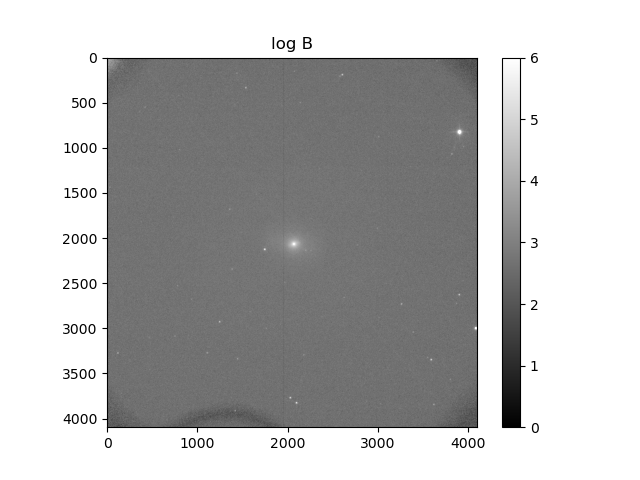

In [30]:
#operaciones matemáticas para el filtro B
plt.imshow(sqrtB, cmap='gray', vmin=0, vmax=6)
plt.title('sqrt B')
plt.colorbar()
plt.savefig('sqrt B')

plt.imshow(quadB, cmap='gray', vmin=0, vmax=np.mean(B_raw)+ np.mean(B_raw))
plt.title('quad B')
plt.savefig('quad B')

plt.imshow(cosB, cmap='gray', vmin=-1, vmax=1)
plt.title('cos B')
plt.savefig('cos B')

plt.imshow(doubleB, cmap='gray', vmin=0, vmax=80)
plt.title('double B')
plt.savefig('double B')

plt.imshow(logB, cmap='gray', vmin=0, vmax=5)
plt.title('log B')
plt.savefig('log B')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
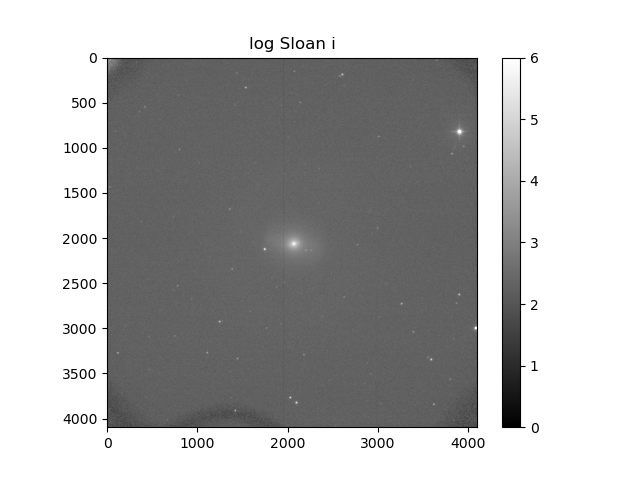

In [45]:
plt.imshow(logSi, cmap='gray', vmin=0, vmax=5)
plt.title('log Sloan i')
plt.colorbar()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
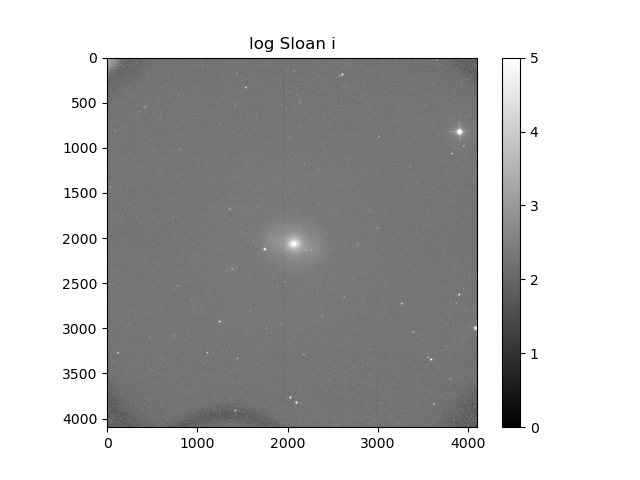

In [55]:
plt.imshow(sqrtSi, cmap='gray', vmin=0, vmax=8)
plt.title('sqrt Sloan i')
plt.colorbar()
plt.savefig('sqrt Sloan i')
plt.close()

plt.imshow(quadSi, cmap='gray', vmin=0, vmax=np.mean(Si_raw)+ np.mean(Si_raw))
plt.title('quad Sloan i')
plt.colorbar()
plt.savefig('quad Sloan i')
plt.close()

plt.imshow(cosSi, cmap='gray', vmin=-1, vmax=1)
plt.title('cos Sloan i')
plt.colorbar()
plt.savefig('cos Sloan i')
plt.close()

plt.imshow(doubleSi, cmap='gray', vmin=0, vmax=80)
plt.title('double Sloan i')
plt.colorbar()
plt.savefig('double Sloan i')
plt.close()

plt.imshow(logSi, cmap='gray', vmin=0, vmax=5)
plt.title('log Sloan i')
plt.colorbar()
plt.savefig('log Sloan i')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
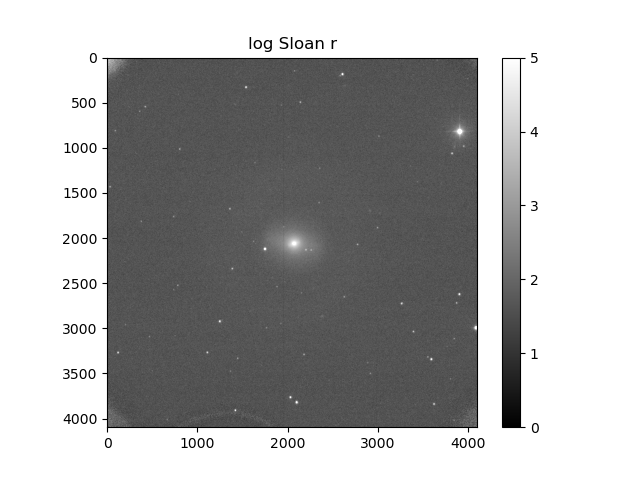

In [62]:
plt.imshow(sqrtSr, cmap='gray', vmin=0, vmax=8)
plt.title('sqrt Sloan r')
plt.colorbar()
plt.savefig('sqrt Sloan r')
plt.close()

plt.imshow(quadSr, cmap='gray', vmin=0, vmax=1700)
plt.title('quad Sloan r')
plt.colorbar()
plt.savefig('quad Sloan r')
plt.close()

plt.imshow(cosSr, cmap='gray', vmin=-1, vmax=1)
plt.title('cos Sloan r')
plt.colorbar()
plt.savefig('cos Sloan r')
plt.close()

plt.imshow(doubleSr, cmap='gray', vmin=0, vmax=80)
plt.title('double Sloan r')
plt.colorbar()
plt.savefig('double Sloan r')
plt.close()

plt.imshow(logSr, cmap='gray', vmin=0, vmax=5)
plt.title('log Sloan r')
plt.colorbar()
plt.savefig('log Sloan r')
plt.show()

In [59]:
np.mean(Sr_raw)+ np.mean(Sr_raw)

2005.7751598358154

In [9]:
## Definimos nuestro kernel de boxcar.
boxcar=(np.vstack([np.ones(3),np.ones(3),np.ones(3)]).T)/6

In [10]:
#Aplicamos 3 filtros diferentes a cada imagen profunda (Gaussiano,Laplaciano y Boxcar)
gaussB=scipy.ndimage.gaussian_filter(B,5)
laplaceB=scipy.ndimage.laplace(B)
boxcarB=scipy.ndimage.convolve(B,boxcar)

In [11]:
gaussSi=scipy.ndimage.gaussian_filter(Si,5)
laplaceSi=scipy.ndimage.laplace(Si)
boxcarSi=scipy.ndimage.convolve(Si,boxcar)

In [12]:
gaussSr=scipy.ndimage.gaussian_filter(Sr,5)
laplaceSr=scipy.ndimage.laplace(Sr)
boxcarSr=scipy.ndimage.convolve(Sr,boxcar)

In [13]:
#Generamos 2 veriones sharpened de cada imagen
unsharp_g_B=2*B-gaussB
unsharp_l_B=B-laplaceB

unsharp_g_Si=2*Si-gaussSi
unsharp_l_Si=Si-laplaceSi

unsharp_g_Sr=2*Sr-gaussSr
unsharp_l_Sr=Sr-laplaceSr

In [19]:
#Sharpened para el filtro B
plt.imshow(unsharp_g_B[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_B)+np.std(unsharp_g_B))
plt.title('sharpened 1 B')
plt.colorbar()
plt.savefig('Sharpened 1B')
plt.close()

plt.imshow(unsharp_l_B[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_B)+np.std(unsharp_l_B))
plt.title('sharpened 2 B')
plt.colorbar()
plt.savefig('Sharpened 2B')
plt.close()


#Sharpened para el filtro Sloan i
plt.imshow(unsharp_g_Si[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_Si)+np.std(unsharp_g_Si))
plt.title('sharpened 1 Sloan i')
plt.colorbar()
plt.savefig('Sharpened 1Sloan i')
plt.close()

plt.imshow(unsharp_l_Si[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_Si)+np.std(unsharp_l_Si))
plt.title('sharpened 2 Sloan i')
plt.colorbar()
plt.savefig('Sharpened 2Sloan i')
plt.close()


#sharpened para el filtro Sloan r
plt.imshow(unsharp_g_Sr[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_g_Sr)+np.std(unsharp_g_Sr))
plt.title('sharpened 1 Sloan r')
plt.colorbar()
plt.savefig('Sharpened 1Sloan r')
plt.close()

plt.imshow(unsharp_l_Sr[1500:2500, 1500:2500], cmap='gray', vmin=0, vmax=np.mean(unsharp_l_Sr)+np.std(unsharp_l_Sr))
plt.title('sharpened 2 Sloan r')
plt.colorbar()
plt.savefig('Sharpened 2Sloan r')
plt.close()

In [49]:
unsharp_g_B

array([[159.78020827, -42.48528485, -42.91864574, ...,  -5.32783226,
         53.88421542,  -4.94694673],
       [-42.32779521, -42.54785199,  12.53045502, ...,  50.85488737,
        -17.1064778 , 158.10755968],
       [158.08552494,  87.85978616,  32.90637778, ..., -17.10505489,
         39.23865242, -17.19684169],
       ...,
       [ 81.47216945, -16.79962878, -16.79726063, ..., -14.76857389,
         31.38176615,  32.30606859],
       [-16.80916746,  12.1763565 , -16.8065352 , ...,  40.2768733 ,
          3.48813586,  32.50149231],
       [ 13.36440428, -16.81114547,  60.48803472, ..., -14.86035248,
        -15.00447081, 128.69390356]])

In [15]:
#Definimos nuestros kernels arbitrarios
Filtro1=np.array([[3,-2,3],[-2,1,-2],[3,-2,3]])
Filtro2=np.array([[1,1,1],[1,-9,1],[1,1,1]])
Filtro3=np.array([[3,3,3],[3,0,3],[3,3,3]])

In [16]:
#Aplicamos estos filtros inventados en cada imagen
f1B=scipy.ndimage.convolve(B,Filtro1)
f2B=scipy.ndimage.convolve(B,Filtro2)
f3B=scipy.ndimage.convolve(B,Filtro3)

f1Si=scipy.ndimage.convolve(Si,Filtro1)
f2Si=scipy.ndimage.convolve(Si,Filtro2)
f3Si=scipy.ndimage.convolve(Si,Filtro3)

f1Sr=scipy.ndimage.convolve(Sr,Filtro1)
f2Sr=scipy.ndimage.convolve(Sr,Filtro2)
f3Sr=scipy.ndimage.convolve(Sr,Filtro3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
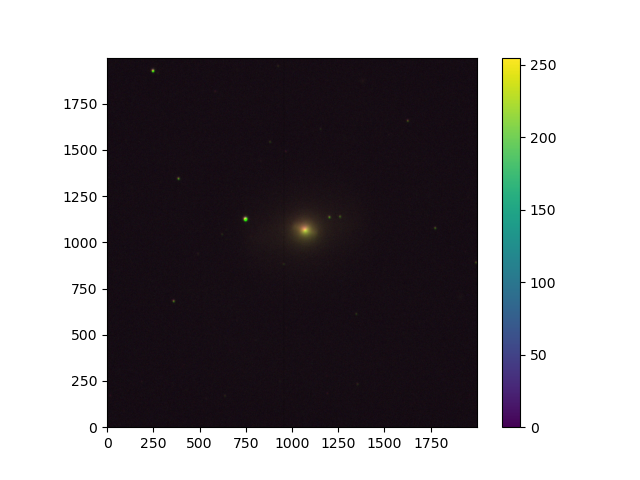

In [19]:
#Finalmente obtenemos una imagen rgb a color
rgb= make_lupton_rgb(Si,Sr,B,stretch=130, Q=5)
plt.imshow(rgb[1000:3000, 1000:3000], origin='lower')
plt.colorbar()
plt.savefig('rgb.png',dpi='figure')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
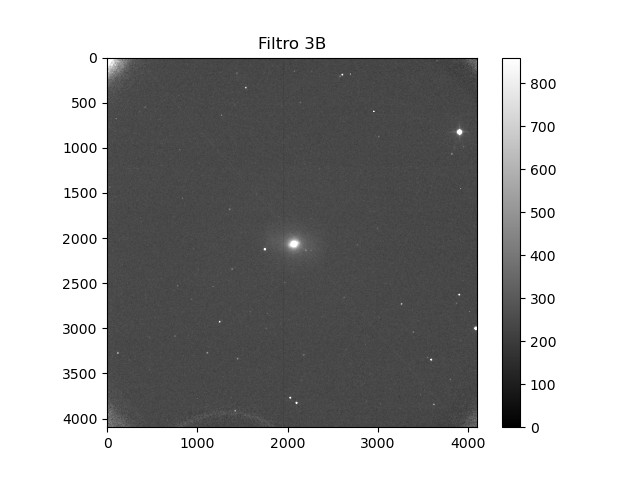

In [30]:
#plot de los filtros para B
plt.imshow(f1B,cmap='gray',vmin=0,vmax=np.mean(f1B)+np.std(f1B))
plt.title('Filtro 1B')
plt.colorbar()
plt.savefig('Filtro 1B')
plt.close()

plt.imshow(f2B,cmap='gray',vmin=-40,vmax=0)
plt.title('Filtro 2B')
plt.colorbar()
plt.savefig('Filtro 2B')
plt.close()

plt.imshow(f3B,cmap='gray',vmin=0,vmax=np.mean(f3B)+np.std(f3B))
plt.title('Filtro 3B')
plt.colorbar()
plt.savefig('Filtro 3B')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
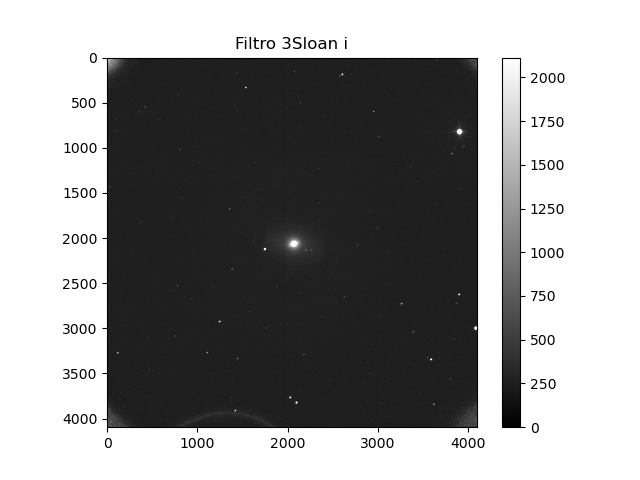

In [32]:
#plot de los filtros para Sloan i
plt.imshow(f1Si,cmap='gray',vmin=0,vmax=np.mean(f1Si)+np.std(f1Si))
plt.title('Filtro 1 Sloan i')
plt.colorbar()
plt.savefig('Filtro 1Sloan i')
plt.close()

plt.imshow(f2Si,cmap='gray',vmin=-50,vmax=10)
plt.title('Filtro 2 Sloan i')
plt.colorbar()
plt.savefig('Filtro 2Sloan i')
plt.close()

plt.imshow(f3Si,cmap='gray',vmin=0,vmax=np.mean(f3Si)+np.std(f3Si))
plt.title('Filtro 3Sloan i')
plt.colorbar()
plt.savefig('Filtro 3Sloan i')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
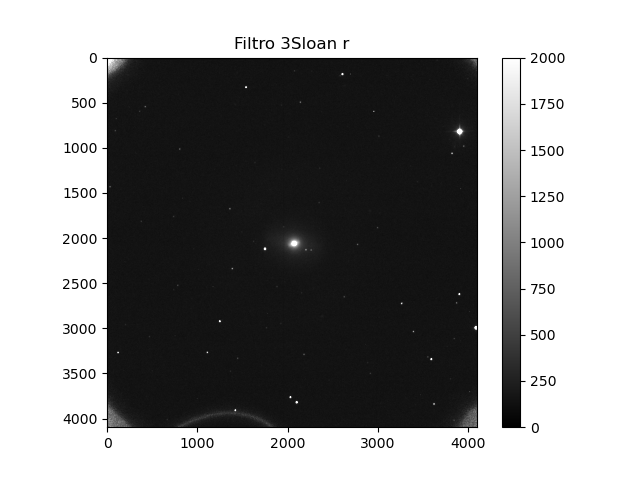

In [46]:
plt.imshow(f1Sr,cmap='gray',vmin=0,vmax=np.mean(f1Sr)+np.std(f1Sr))
plt.title('Filtro 1Sloan r')
plt.colorbar()
plt.savefig('Filtro 1 Sloan r')
plt.close()

plt.imshow(f2Sr,cmap='gray',vmin=-40,vmax=10)
plt.title('Filtro 2Sloan r')
plt.colorbar()
plt.savefig('Filtro 2 Sloan r')
plt.close()

plt.imshow(f3Sr,cmap='gray',vmin=0,vmax=2000)
plt.title('Filtro 3Sloan r')
plt.colorbar()
plt.savefig('Filtro 3 sloan r')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
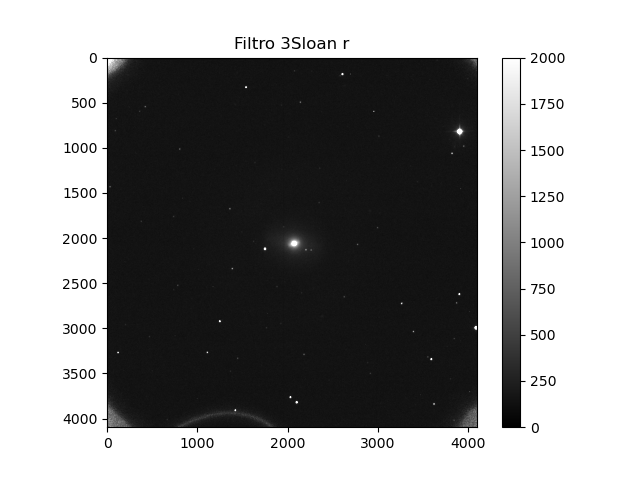